In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
from statsmodels.formula.api import ols

In [3]:
data = pd.read_csv('/Users/luisfelipemh/Desktop/Personal/hotel_bookings.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/luisfelipemh/Desktop/Personal/hotel_bookings.csv'

In [441]:
#exploratory data analysis
data.shape

(119390, 32)

In [442]:
data.head(n=10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015


In [443]:
#with this help you can see the number of rows and columns
data.shape
#we see that we've 119390 rows and 32 columns

(119390, 32)

In [444]:
#this function show us which columns has missing values, and the quantity of missed values
def identification(data):
    lista=data.columns.tolist()
    for i in lista:
        if True in data[i].isnull().tolist():
            x = data[i].isnull().sum()
            print(f'Column {i}: fill the values'+' '+'/ missed values :'+' '+str(x))
        else:
            print(f'Column {i}: its PERFECT')

In [445]:
identification(data)

Column hotel: its PERFECT
Column is_canceled: its PERFECT
Column lead_time: its PERFECT
Column arrival_date_year: its PERFECT
Column arrival_date_month: its PERFECT
Column arrival_date_week_number: its PERFECT
Column arrival_date_day_of_month: its PERFECT
Column stays_in_weekend_nights: its PERFECT
Column stays_in_week_nights: its PERFECT
Column adults: its PERFECT
Column children: fill the values / missed values : 4
Column babies: its PERFECT
Column meal: its PERFECT
Column country: fill the values / missed values : 488
Column market_segment: its PERFECT
Column distribution_channel: its PERFECT
Column is_repeated_guest: its PERFECT
Column previous_cancellations: its PERFECT
Column previous_bookings_not_canceled: its PERFECT
Column reserved_room_type: its PERFECT
Column assigned_room_type: its PERFECT
Column booking_changes: its PERFECT
Column deposit_type: its PERFECT
Column agent: fill the values / missed values : 16340
Column company: fill the values / missed values : 112593
Column 

In [446]:
#other import thing is to know the unique values of a column, for this case, we will do
#the analysis only for the columns with ten or less unique values
for i in data.columns.tolist():
    if len(data[i].unique().tolist())<=10:
        print('column {} has the following unique values: {}'.format(i,data[i].unique()))
    else:
        print(f'the analysis doesn apply for {i}')

column hotel has the following unique values: ['Resort Hotel' 'City Hotel']
column is_canceled has the following unique values: [0 1]
the analysis doesn apply for lead_time
column arrival_date_year has the following unique values: [2015 2016 2017]
the analysis doesn apply for arrival_date_month
the analysis doesn apply for arrival_date_week_number
the analysis doesn apply for arrival_date_day_of_month
the analysis doesn apply for stays_in_weekend_nights
the analysis doesn apply for stays_in_week_nights
the analysis doesn apply for adults
column children has the following unique values: [ 0.  1.  2. 10.  3. nan]
column babies has the following unique values: [ 0  1  2 10  9]
column meal has the following unique values: ['BB' 'FB' 'HB' 'SC' 'Undefined']
the analysis doesn apply for country
column market_segment has the following unique values: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
column distribution_channel has the following 

In [447]:
#the number of adults can be 0
#data=data[(data['adults']!=0)&(data['children']!=0)&(data['children']!=0)]

In [448]:
len(data)

119390

In [449]:
import folium

In [450]:
from folium.plugins import HeatMap

In [451]:
import plotly.express as px

In [452]:
geo_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()

In [453]:
geo_data

,index,country
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,PLW,1
161,BHR,1
162,AIA,1
163,SYC,1


In [454]:
geo_map=px.choropleth(geo_data,
             locations=geo_data['index'],
             color=geo_data['country'])

In [455]:
geo_map.show()

<AxesSubplot:xlabel='reserved_room_type', ylabel='adr'>

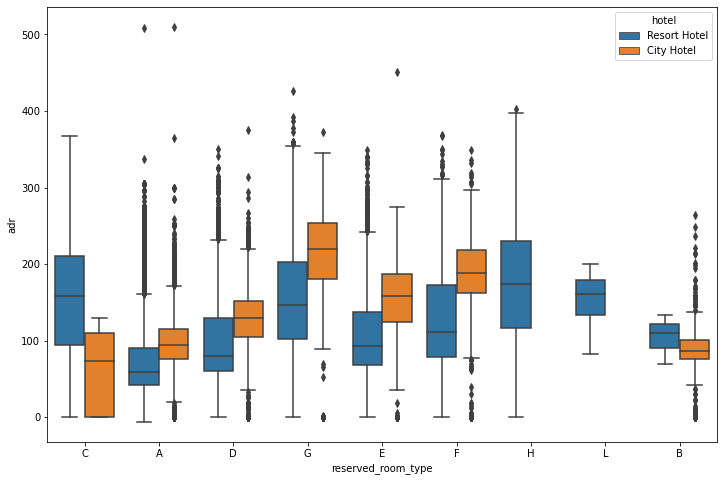

In [456]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data[data['is_canceled']==0],x='reserved_room_type',y='adr',hue='hotel')

In [457]:
data[['arrival_date_month','arrival_date_year','arrival_date_day_of_month']]

,arrival_date_month,arrival_date_year,arrival_date_day_of_month
0,July,2015,1
1,July,2015,1
2,July,2015,1
3,July,2015,1
4,July,2015,1
...,...,...,...
119385,August,2017,30
119386,August,2017,31
119387,August,2017,31
119388,August,2017,31


In [458]:
from datetime import datetime

In [459]:
data1=data.copy()

In [460]:
#this function allow us to change the name of the month to an integer,
#in order to do a time series analysis
def tmonth(data):
    return datetime.strptime(str(data), '%B').month

In [461]:
data1["arrival_date_month_number"]=data1["arrival_date_month"].apply(lambda x: tmonth(x))

In [462]:
data1[['arrival_date_month','arrival_date_month_number']]

,arrival_date_month,arrival_date_month_number
0,July,7
1,July,7
2,July,7
3,July,7
4,July,7
...,...,...
119385,August,8
119386,August,8
119387,August,8
119388,August,8


In [463]:
data1['final_date']=data1['arrival_date_day_of_month'].astype(str)+'/'+data1['arrival_date_month_number'].astype(str)+'/'+data1['arrival_date_year'].astype(str)

In [464]:
data1[['final_date','company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   final_date  119390 non-null  object 
 1   company     6797 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [465]:
pd.to_datetime(data1['final_date'], infer_datetime_format=True) 

0        2015-01-07
1        2015-01-07
2        2015-01-07
3        2015-01-07
4        2015-01-07
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: final_date, Length: 119390, dtype: datetime64[ns]

In [466]:
def date_time(data):
    return pd.to_datetime(data, infer_datetime_format=True) 

In [467]:
data1["final_date"]=data1["final_date"].apply(lambda x: date_time(x))

In [468]:
data1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_number', 'final_date'],
      dtype='object')

In [469]:
#times series plot of the cancellations
time_data=data1[['final_date','is_canceled']].groupby(by='final_date').count()

In [470]:
time_data

,is_canceled
final_date,
2015-01-07,122
2015-01-08,110
2015-01-09,100
2015-01-10,121
2015-01-11,57
...,...
2017-12-04,133
2017-12-05,151
2017-12-06,180


In [471]:
time_data_p=data1[['final_date','is_canceled']].groupby('final_date')['is_canceled'].apply(lambda x: (x==1).sum())
time_data_week=data1[['arrival_date_week_number','is_canceled']].groupby('arrival_date_week_number')['is_canceled'].apply(lambda x: (x==1).sum())

<AxesSubplot:xlabel='final_date'>

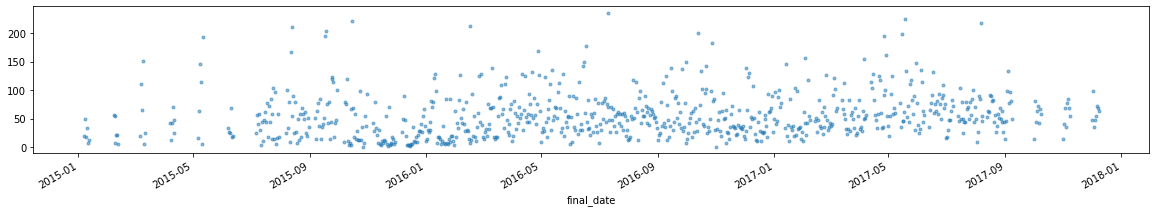

In [472]:
#the plot exhibit the count of cancelations through the time
time_data_p.plot(marker='.',alpha=0.5,linestyle='None',figsize=(20,3))

In [473]:
#sorted(data1['arrival_date_week_number'].unique().tolist())

<AxesSubplot:xlabel='arrival_date_week_number'>

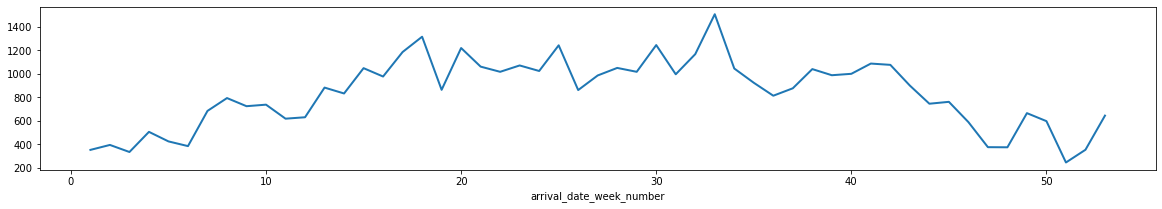

In [474]:
#in the week number 4 we observe the higher number of cancellations
time_data_week.plot(linewidth=2,figsize=(20,3))

In [475]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [476]:
#QUESTION: How does the price per night vary over the year
price_month=data.loc[data.hotel=='Resort Hotel'][['arrival_date_month','adr']].groupby(by=['arrival_date_month']).mean()

In [477]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [478]:
month_price=price_month.reset_index() #in this case, the dataframe was sorted by letter

In [479]:
month_price

,arrival_date_month,adr
0,April,77.849496
1,August,186.790574
2,December,68.984230
3,February,55.171930
4,January,49.461883
5,July,155.181299
6,June,110.444749
7,March,57.520147
8,May,78.758134
9,November,48.273993


In [480]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays

In [481]:
data.shape

(119390, 32)

In [482]:
import sort_dataframeby_monthorweek as sd

In [483]:
def sort_data(data,column):
    return sd.Sort_Dataframeby_Month(data,column)

In [484]:
sort_data(month_price,'arrival_date_month')

,arrival_date_month,adr
0,January,49.461883
1,February,55.171930
2,March,57.520147
3,April,77.849496
4,May,78.758134
5,June,110.444749
6,July,155.181299
7,August,186.790574
8,September,93.252030
9,October,62.097617


In [485]:
#Correlations
data.shape

(119390, 32)

In [486]:
for i in data.columns.tolist():
    print(f'column {i} ha the following unique values: '+str(len(data[i].unique().tolist())))

column hotel ha the following unique values: 2
column is_canceled ha the following unique values: 2
column lead_time ha the following unique values: 479
column arrival_date_year ha the following unique values: 3
column arrival_date_month ha the following unique values: 12
column arrival_date_week_number ha the following unique values: 53
column arrival_date_day_of_month ha the following unique values: 31
column stays_in_weekend_nights ha the following unique values: 17
column stays_in_week_nights ha the following unique values: 35
column adults ha the following unique values: 14
column children ha the following unique values: 6
column babies ha the following unique values: 5
column meal ha the following unique values: 5
column country ha the following unique values: 178
column market_segment ha the following unique values: 8
column distribution_channel ha the following unique values: 5
column is_repeated_guest ha the following unique values: 2
column previous_cancellations ha the follo

In [487]:
#this function allows you to do a correlation heatmap based on the columns which their unique values are
#greater than uni
def heat_map(dataframe,uni):
    for columns in dataframe.columns:
        if len(dataframe[columns].unique())<=uni:
            dataframe.drop(columns,inplace=True,axis=1)
    plt.figure(figsize=(12,8))
    sns.heatmap(dataframe.corr(),annot=True)

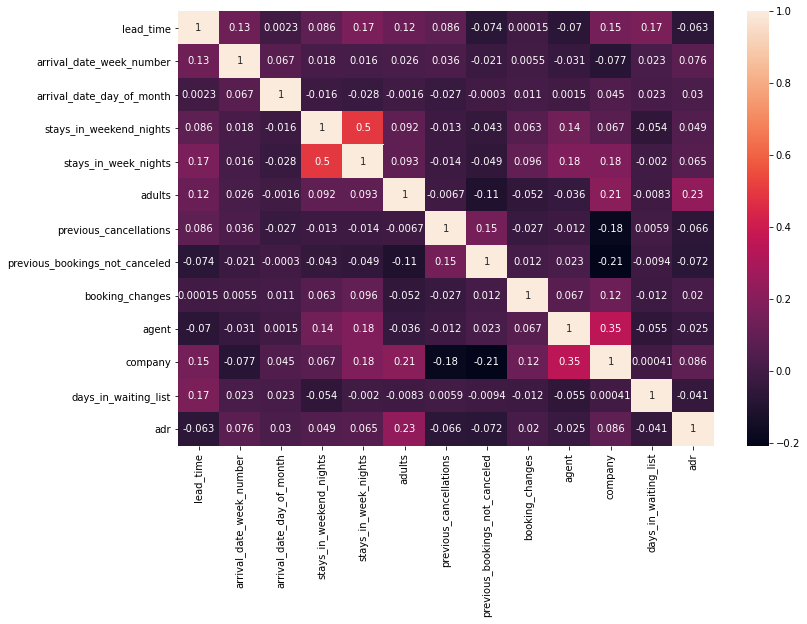

In [488]:
data03=data.copy()
heat_map(data03,10) 

In [489]:
data.shape

(119390, 32)

In [490]:
#for example, if you would like to see the variables that has the high correlation with the depende variable
#you can do somethinhg like this:
data.corr()['is_canceled'].abs().sort_values(ascending=False)
#we see that a cancellation has a direct relationship whit the special requirements

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [491]:
data.shape

(119390, 32)

In [492]:
#this function return the columns that aren't object
#note: the return value could be [] or {}
#we can assign a variable
columns_no_object=[column for column in data.columns if data[column].dtype!='object']

In [493]:
data.shape

(119390, 32)

In [494]:
columns_not_object=[]
for col in data.columns:
    if data[col].dtype!='object' and col not in ['arrival_date_year','booking_changes','reservation_status','country','assigned_room_type']:
        columns_not_object.append(col)
columns_not_object

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [495]:
data.shape

(119390, 32)

In [496]:
features_columns=[col for col in data.columns if data[col].dtype=='object']

In [497]:
data.shape

(119390, 32)

In [498]:
len(data.columns)==len(columns_not_object)+len(features_columns)

False

In [499]:
categorical_data=data[features_columns]

In [500]:
categorical_data.dtypes

hotel                      object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

In [501]:
#now, its necessary to convert some object to datetime variables

In [502]:
data.shape

(119390, 32)

In [503]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [504]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])

In [505]:
data['reservation_status_date'].dt.year.head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: reservation_status_date, dtype: int64

In [506]:
#now, we can create particular columns for year, month and day
data['year']=data['reservation_status_date'].dt.year
data['month']=data['reservation_status_date'].dt.month
data['day']=data['reservation_status_date'].dt.day

In [507]:
data.shape

(119390, 35)

In [508]:
#we can delete the column that contents the complete 
data.drop('reservation_status_date',axis=1,inplace=True)

In [509]:
data.shape

(119390, 34)

In [510]:
data['cancellation']=data['is_canceled']

In [511]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,year,month,day,cancellation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015,7,1,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015,7,1,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015,7,2,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015,7,2,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015,7,3,0


In [512]:
data.drop('is_canceled',axis=1,inplace=True)

In [513]:
data.shape

(119390, 34)

In [514]:
#its necessary to transform the categorical column into numerical data
### Mean encoding technique ###


In [515]:
data['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [516]:
data_cat=categorical_data[['hotel','arrival_date_month','meal','market_segment',
                          'distribution_channel','reserved_room_type',
                          'deposit_type','customer_type']]

In [517]:
cols=data_cat.columns

In [518]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [519]:
#would be interest if we see the mean of cancellations by categorical columns
data.groupby(['hotel'])['cancellation'].mean()

hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: cancellation, dtype: float64

In [520]:
data.shape

(119390, 34)

In [521]:
#with to dict i can convert de 'dataframes' into dictionaries
for col in cols:
    print(data.groupby([col])['cancellation'].mean().to_dict())
    print('---')

{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}
---
{'April': 0.4079718640093787, 'August': 0.3775311666786769, 'December': 0.3497050147492625, 'February': 0.3341596430342092, 'January': 0.3047731489289931, 'July': 0.37453597662112, 'June': 0.4145717158789652, 'March': 0.3215233816622422, 'May': 0.39665846832329743, 'November': 0.3123344127171033, 'October': 0.3804659498207885, 'September': 0.3917015607156452}
---
{'BB': 0.3738489871086556, 'FB': 0.5989974937343359, 'HB': 0.3446034709258107, 'SC': 0.3723943661971831, 'Undefined': 0.2446535500427716}
---
{'Aviation': 0.21940928270042195, 'Complementary': 0.13055181695827725, 'Corporate': 0.1873465533522191, 'Direct': 0.15341900682214818, 'Groups': 0.6106203624249155, 'Offline TA/TO': 0.34316032866757507, 'Online TA': 0.3672114312020823, 'Undefined': 1.0}
---
{'Corporate': 0.22075782537067545, 'Direct': 0.17459883919426425, 'GDS': 0.19170984455958548, 'TA/TO': 0.41025850618166954, 'Undefined': 0.8}
---
{'A': 0.39

In [522]:
data.shape

(119390, 34)

In [523]:
#maps executes a function on each element of an iterator
for col in cols:
    dictionary=data.groupby([col])['cancellation'].mean().to_dict()
    data[col]=data[col].map(dictionary)

In [524]:
data.shape

(119390, 34)

In [525]:
#now the Machine learning model can understand the Cateogrical variable through the means 
for i in data.columns:
    tipo=data[i].dtypes
    print(f'{tipo}'+' '+f'{i}')

float64 hotel
int64 lead_time
int64 arrival_date_year
float64 arrival_date_month
int64 arrival_date_week_number
int64 arrival_date_day_of_month
int64 stays_in_weekend_nights
int64 stays_in_week_nights
int64 adults
float64 children
int64 babies
float64 meal
object country
float64 market_segment
float64 distribution_channel
int64 is_repeated_guest
int64 previous_cancellations
int64 previous_bookings_not_canceled
float64 reserved_room_type
object assigned_room_type
int64 booking_changes
float64 deposit_type
float64 agent
float64 company
int64 days_in_waiting_list
float64 customer_type
float64 adr
int64 required_car_parking_spaces
int64 total_of_special_requests
object reservation_status
int64 year
int64 month
int64 day
int64 cancellation


In [526]:
#this function allows me to drop all the columns which type was an object
#Its not necessary to put else or pass (i must study functions)
drop_columns=[]
for i in data.columns:
    if data[i].dtypes=='object':
        drop_columns.append(i)
data.drop(drop_columns, axis=1, inplace=True)

In [527]:
data.shape

(119390, 31)

In [528]:
#How to handle with ourliers (valores atipicos)
# How we can find outliers in our data?


/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

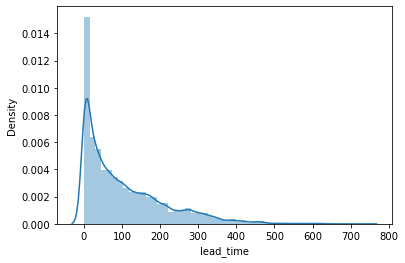

In [529]:
#this function imports a distribution plot
sns.distplot(data['lead_time'])

In [530]:
#we can do a logharitmic transformation of the variable
def handle_outliers(col):
    data[col]=np.log1p(data[col])

In [531]:
data.shape

(119390, 31)

In [532]:
handle_outliers('lead_time')

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='lead_time', ylabel='Density'>

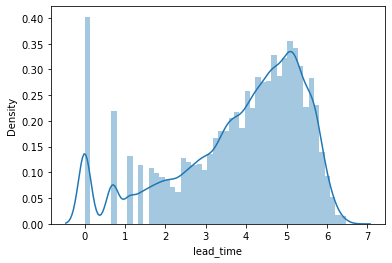

In [533]:
#look that, now, we don't have the atypical extreme values
sns.distplot(data['lead_time'])

In [534]:
handle_outliers('adr')

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning:

invalid value encountered in log1p



/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='adr', ylabel='Density'>

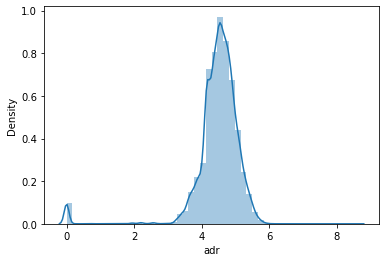

In [535]:
sns.distplot(data['adr'].dropna())

In [536]:
data.shape

(119390, 31)

In [537]:
# Apply techniques of feature importance on data to select most important features
# Its necessary to subselect the features that can impact in a positive sense on your machine learning model
data.isnull().sum()

hotel                                  0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [538]:
data=data.drop(columns=['agent','company'])

In [539]:
#if you want to drop d the NA values
data.dropna(inplace=True)

In [540]:
data.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
year                              0
month                             0
day                         

In [541]:
data.shape

(119385, 29)

In [542]:
#its time to define our dependent and independent variables
y=data['cancellation']
x=data.drop('cancellation',axis=1)

In [543]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [544]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005,random_state=0)) #Alpha es equivalent to a penalty parameter, it means the bigger the values of the
#alpha, the less number of the features will get select
#This select the features that are not 0

In [545]:
data.shape

(119385, 29)

In [546]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [547]:
#all the columns in the form of list
#for false, the column is not contributing more for the machine learning model
feature_sel_model.get_support()

array([False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [548]:
x.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'year', 'month', 'day'],
      dtype='object')

In [549]:
#Convert the preovious list into a dictionario
#zip return a tuple of elments, outside zip you can return a list or a dictionary
dict_sel_model = dict(zip(x.columns.tolist(),feature_sel_model.get_support().tolist()))

In [550]:
dict_sel_model

{'hotel': False,
 'lead_time': True,
 'arrival_date_year': True,
 'arrival_date_month': False,
 'arrival_date_week_number': True,
 'arrival_date_day_of_month': True,
 'stays_in_weekend_nights': True,
 'stays_in_week_nights': True,
 'adults': True,
 'children': True,
 'babies': False,
 'meal': False,
 'market_segment': False,
 'distribution_channel': False,
 'is_repeated_guest': False,
 'previous_cancellations': True,
 'previous_bookings_not_canceled': True,
 'reserved_room_type': False,
 'booking_changes': True,
 'deposit_type': True,
 'days_in_waiting_list': True,
 'customer_type': False,
 'adr': True,
 'required_car_parking_spaces': True,
 'total_of_special_requests': True,
 'year': True,
 'month': True,
 'day': True}

In [551]:
#these are the columns which are supported
selected_feat=x.columns[feature_sel_model.get_support().tolist()].tolist()

In [552]:
#from 30 feature, in this case, we select 13.
print('total_features {}'.format(x.shape[1]))
print('total_features {}'.format(len(selected_feat)))

total_features 28
total_features 19


In [553]:
#its is the independt features that i could consider
selected_feat

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'year',
 'month',
 'day']

In [554]:
x=x[selected_feat]

# LOGISTIC REGRESSION

In [555]:
#Its a classification algorithm, can be, 0, 1, 2 (three types of categories)
#CROSS VALIDATION
#How cross validation increase our accuracy?
#I can divide the data in X_train and X_test, Y_train, Y_test
#test_size serves you to choose which % of the data will be destined to trainy, and test
#every time i change the test size, my accuracy will fluctuate
#I have to cross validate my data five times
#The CV make different interations changing the test size in order to compare the accuracy
#For each accuracy of each iteration you apply the final mean

In [556]:
from sklearn.model_selection import train_test_split

In [557]:
#Now, we are going to divide the data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=0) #25% of your data will be selected as the test data

In [558]:
from sklearn.linear_model import LogisticRegression

In [559]:
logreg=LogisticRegression()

In [560]:
logreg.fit(X_train,y_train)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [561]:
y_pred=logreg.predict(X_test)

In [562]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [563]:
from sklearn.metrics import confusion_matrix

In [564]:
confusion_matrix(y_test, y_pred)

array([[15249,  3380],
       [ 5189,  6029]])

In [565]:
from sklearn.metrics import accuracy_score

In [566]:
accuracy_score(y_test,y_pred)

0.7129024692598921

In [568]:
from sklearn.model_selection import cross_val_score

In [571]:
score=cross_val_score(logreg,x,y,cv=10)

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/luisfelipemh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Use

In [573]:
#this is the final accuracy
score.mean()

0.6801352468952334